In [1]:
import os   
import cv2  #for-computer-vision
import numpy as np   #numpy-arrays
import matplotlib.pyplot as plt   #visualization
import  tensorflow as tf   #machine-learning-part

In [9]:
mnist=tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test)=mnist.load_data()
#xdata--> image/pixel data
#ydata--> classification

x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))    #0 #not a gird, a line of 784 pixels
model.add(tf.keras.layers.Dense(128, activation='relu'))   #1 #most basic NN layer where each neuron is connected to every other neuron of another network. 
model.add(tf.keras.layers.Dense(128, activation='relu'))   #2
model.add(tf.keras.layers.Dense(10, activation='softmax')) #3  #this-is-for-having-the-output-10-neurons-for-10-digits
#here softmax activation function is used to guess the probability of every digit

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=6)
model.save('handwritten.model')



Epoch 1/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2673 - accuracy: 0.9220
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1093 - accuracy: 0.9669
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0747 - accuracy: 0.9762
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0550 - accuracy: 0.9827
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0416 - accuracy: 0.9863
Epoch 6/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0316 - accuracy: 0.9897
INFO:tensorflow:Assets written to: handwritten.model/assets


In [10]:
model=tf.keras.models.load_model('handwritten.model')
loss, accuracy= model.evaluate(x_test, y_test)
print(loss)    #low loss(0-1)
print(accuracy)  #high accuracy  range(0-1)

313/313 [==============================] - 1s 1ms/step - loss: 0.0982 - accuracy: 0.9725
0.09821692854166031
0.9725000262260437


The digit is probably 3


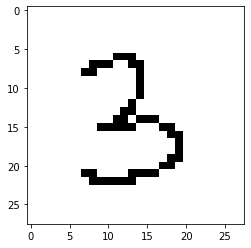

The digit is probably 8


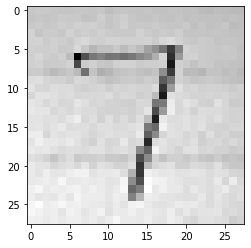

The digit is probably 9


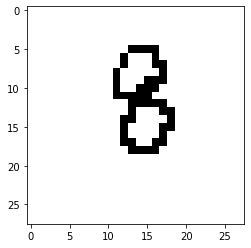

The digit is probably 7


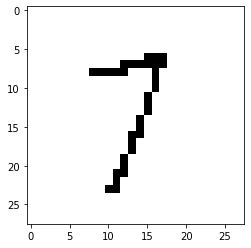

The digit is probably 2


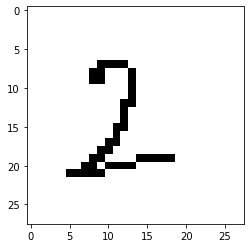

The digit is probably 8


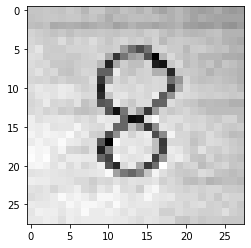

The digit is probably 9


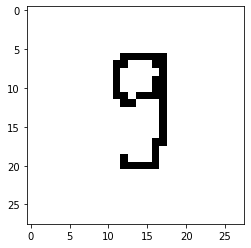

The digit is probably 9


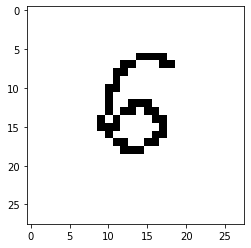

The digit is probably 5


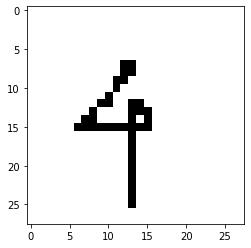

The digit is probably 0


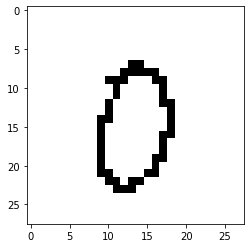

The digit is probably 1


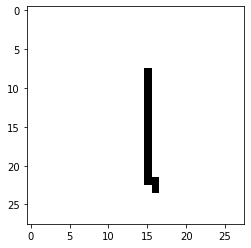

The digit is probably 2


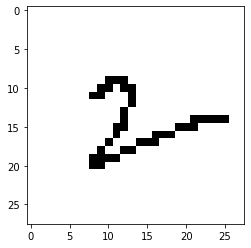

The digit is probably 6


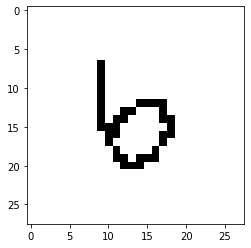

The digit is probably 8


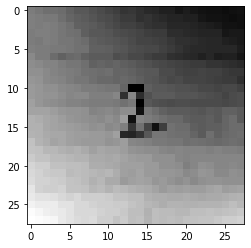

The digit is probably 8


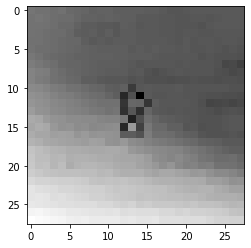

In [12]:
model=tf.keras.models.load_model('handwritten.model')
image_number=1
while os.path.isfile(f"digits/digit{image_number}.png"):
  try:
    img=cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
    img=np.invert(np.array([img]))
    prediction=model.predict(img)
    print(f"The digit is probably {np.argmax(prediction)}")   #gives the index of the image-ie the digit
    plt.imshow(img[0], cmap=plt.cm.binary) 
    plt.show()

  except:
    print("Error")
  
  finally:
    image_number +=1
